In [1]:
from bs4 import BeautifulSoup
import urllib
import pandas as pd
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import datetime
from collections import OrderedDict
import numpy as np
import logging
import time as tm
import pickle
import matplotlib.pyplot as plt
import matplotlib

In [2]:
from matplotlib import font_manager, rc
font_location = "C:/Windows/Fonts/NanumSquareR.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
print(font_name)
rc('font', family="NanumSquare")

NanumSquare


In [17]:
import seaborn as sns
sns.set(font_scale=2)
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
#matplotlib.rc('font', family="NanumBarunGothic")

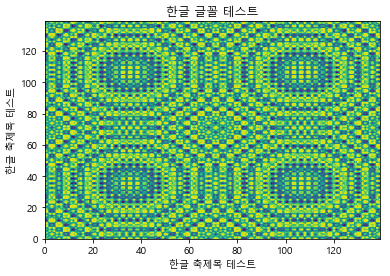

In [4]:
x, y = np.mgrid[0:140, 0:140]
z = np.cos((x**2 + y**2) * 200)
plt.title("한글 글꼴 테스트")
plt.xlabel("한글 축제목 테스트")
plt.ylabel("한글 축제목 테스트")
plt.contourf(z)
plt.show()

In [2]:
driver = webdriver.Chrome('E:\\unist\\chromedriver')

In [105]:
path = 'E:\\unist\\knc\\'
urls = pd.read_csv(path+'contents_knc0802.csv', encoding='cp949')
urls

,Industry,URL,Title,Date,site,contents
0,PL,http://news.mt.co.kr/mtview.php?no=20180722154...,'주행중 화재' BMW 자발적 리콜키로..빠르면 이번주 발표,2018-07-22,news.mt.co.kr,\r\n\r\n지난 1월 13일 오후 9시12분 구리 방면 강변북로의 동호대교 바로...
1,PL,http://www.ytn.co.kr/_ln/0103_201807230828033737,BMW 520d에 집중된 화재...왜 그런가?,2018-07-23,www.ytn.co.kr,NaN
2,PL,http://www.sisajournal-e.com/biz/article/186757,"“의문의 화재는 보상 불가”…폴크스바겐, 차량 보상규정 도마위",2018-07-20,www.sisajournal-e.com,폴크스바겐 코리아가 차량 화재의 원인이 규명되지 않을 경우 소비자 보상이 전무한 규...
3,PL,http://www.speconomy.com/news/articleView.html...,"에어컨 소비자 피해 해마다 급증, 소비자원 “설치 관련 가장 많아”",2018-07-21,www.speconomy.com,?\r\r\n\r\r\n[스페셜경제=윤성균 기자] #.1 A씨는 에어컨을 45만원에...
4,PL,http://www.newspim.com/news/view/20180722000050,"대한항공?아시아나, 잇따라 기체결함...항공안전 '빨간불'",2018-07-22,www.newspim.com,[서울=뉴스핌] 유수진 기자 = 양대 국적항공사인 대한항공과 아시아나항공 여객기에서...
5,PL,http://www.yonhapnews.co.kr/bulletin/2018/07/2...,"'마린온' 사고부대 전역병 ""사고헬기 잦은 결함으로 매일 정비""",2018-07-20,www.yonhapnews.co.kr,故 박 상병 군부대 찾은 아버지와 기념사진(포항=연합뉴스) 지난 17일 &apos;...
6,PL,http://www.mdtoday.co.kr/mdtoday/index.html?no...,중국 제지앙 화하이 발사르탄 공포 확산.. 미국내 리콜· 추가 공급 중단,2018-07-22,www.mdtoday.co.kr,\r\n ［메디컬투데이 지용준 기자］심장치료제인 발사르탄(valsa...
7,PL,http://www.newsis.com/view/?id=NISX20180720_00...,"英 ""화웨이 통신장비 보안성에 결함…안보 위협 될 수도""",2018-07-20,www.newsis.com,"\r\r\n\t\t\t\t\t\t\t\t\t\t英 HCSEC ""국가안보 위협 해소..."
8,PL,http://www.bizhankook.com/bk/article/15901,'존슨앤드존슨 사건'에서 국민주권과 정의구현을 보다,2018-07-23,www.bizhankook.com,[비즈한국] 지난 12일(현지시각) 발암물질인 석면이 포함된 베이비파우더 등을 제조...
9,PL,http://news.einfomax.co.kr/news/articleView.ht...,"美 몬델레즈, 살모넬라균 감염 우려해 리츠 크래커 리콜",2018-07-23,news.einfomax.co.kr,\r\n\t\t\t\t\t\t\t리츠 크래커 샌드위치-비츠 제품 16가지 美서 자발...


In [107]:
urls.site.nunique()

256

In [99]:
urls.Industry.unique()

array(['PL', '인증', '호텔', 'Amazon', '담배', '건설업', 'LED', 'Visa', '보험',
       '화학기업', '화평법', '자동차'], dtype=object)

In [104]:
len(urls[urls['Industry'].isin(['호텔'])])

41

In [103]:
len(urls[urls['contents'].notnull()])

1203

In [22]:
y = pd.DataFrame(urls.Industry.value_counts()).reset_index()

In [8]:
urls.loc[urls['URL'].str.split('/').str.len()>2, 'portal2'] = urls.loc[urls['URL'].str.split('/').str.len()>2, 'URL'].apply(lambda x: x.split('/')[2])

In [78]:
x = pd.DataFrame(urls['portal2'].value_counts()).reset_index()

In [79]:
for b in [a for a in x['index'].tolist() if a not in press_dic.keys()]:
    press_dic[b] = ''

In [92]:
press_dic['health.chosun.com'] = '헬스조선'

In [93]:
top20 = x.iloc[:20]
top20['press'] = top20['index'].apply(lambda x: press_dic[x])
top20

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,index,portal2,press
0,www.yonhapnews.co.kr,3,연합뉴스
1,news.heraldcorp.com,3,헤럴드경제
2,www.edaily.co.kr,2,이데일리
3,news.chosun.com,2,조선일보
4,www.etoday.co.kr,2,이투데이
5,www.mdtoday.co.kr,2,메디컬투데이
6,www.newsis.com,2,뉴시스
7,news.naver.com,1,네이버뉴스
8,isplus.live.joins.com,1,일간스포츠
9,www.kns.tv,1,KNS뉴스


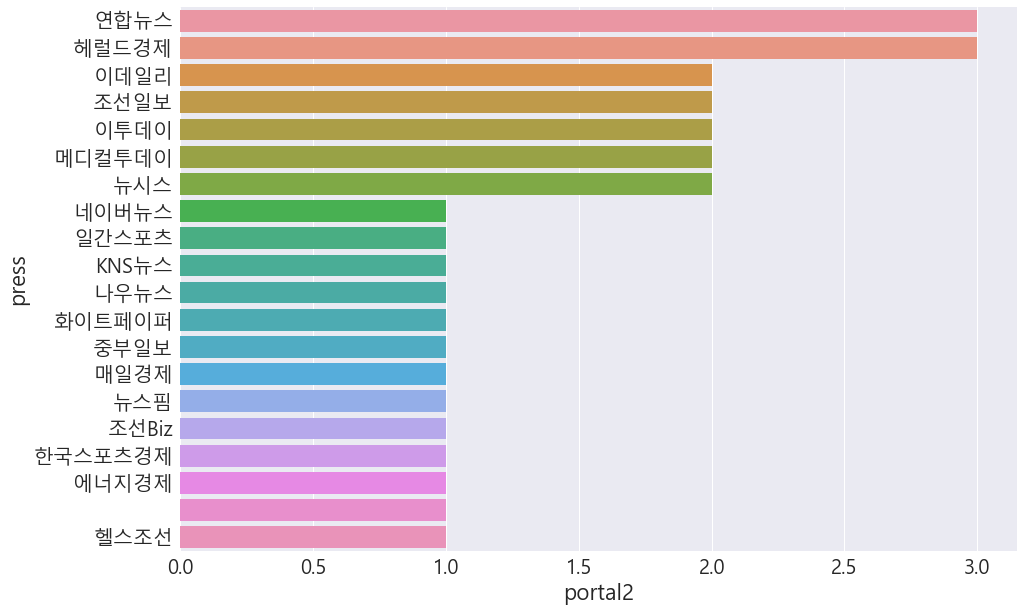

In [94]:
plt.figure(figsize=(15,10))

sns.barplot(top20['portal2'], top20['press'])

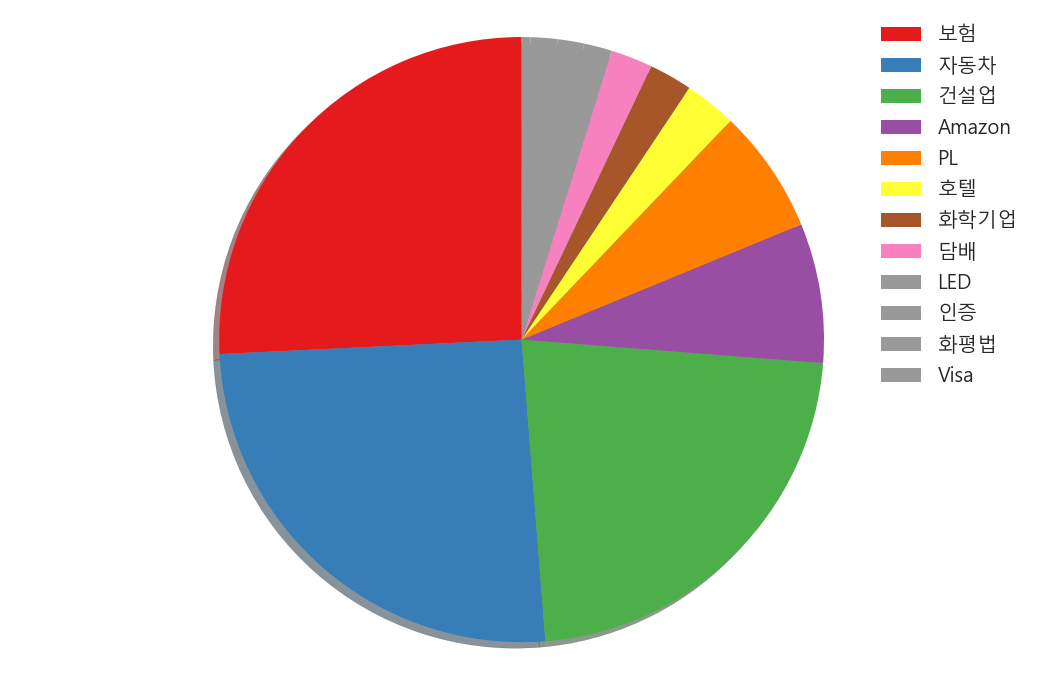

In [43]:
import matplotlib.pyplot as plt
from matplotlib import cm
cs=cm.Set1(np.arange(20))

plt.figure(figsize=(15,10))
labels = y['index']
sizes = y['Industry']
patches, texts = plt.pie(sizes, colors=cs, shadow=True, startangle=90)


plt.axis('equal')
plt.tight_layout()
plt.show()

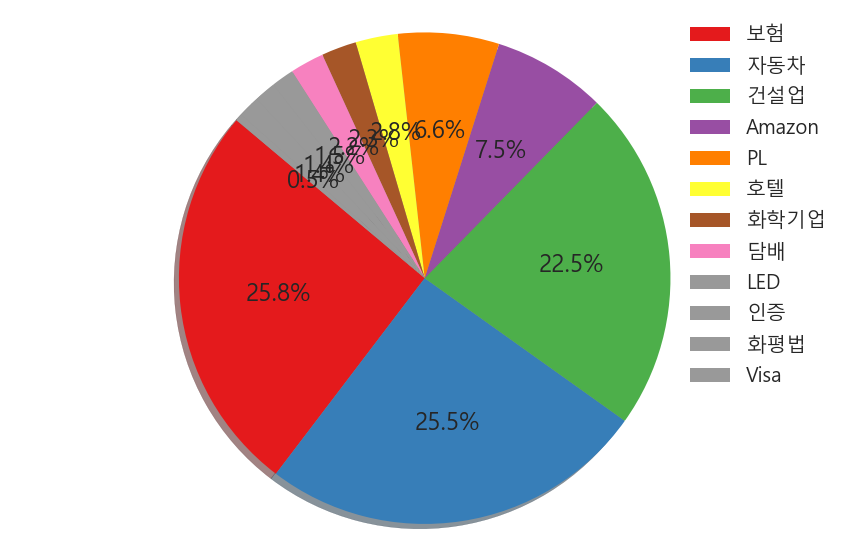

In [48]:
import matplotlib.pyplot as plt
from matplotlib import cm
cs=cm.Set1(np.arange(12))
labels = y['index']
sizes = y['Industry']
plt.figure(figsize=(15,10))
plt.pie(sizes,colors=cs,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.show()

In [13]:
urls = urls[urls['URL'].str.split('/').str.len() > 2]
temp = urls.URL.str.split('/')
urls['site'] = [a[2] for a in temp]

In [14]:
sites = pd.DataFrame(urls['site'].value_counts()).reset_index()
sites

,index,site
0,www.cnews.co.kr,84
1,news.hankyung.com,56
2,autotimes.hankyung.com,39
3,news.mk.co.kr,33
4,www.thebell.co.kr,32
5,www.etnews.com,31
6,www.insnews.co.kr,31
7,www.yonhapnews.co.kr,31
8,www.edaily.co.kr,30
9,www.newspim.com,29


In [10]:
urls.loc[urls['site'].str.contains('.co.kr'), 'portal'] = urls.loc[urls['site'].str.contains('.co.kr'), 'site'].apply(lambda x: x.split('.co.kr')[0] + '.co.kr')
urls.loc[urls['site'].str.contains('.com'), 'portal'] = urls.loc[urls['site'].str.contains('.com'), 'site'].apply(lambda x: x.split('.com')[0] + '.com')
urls.loc[urls['site'].str.contains('.kr'), 'portal'] = urls.loc[urls['site'].str.contains('.kr'), 'site'].apply(lambda x: x.split('.kr')[0] + '.kr')
urls.loc[urls['site'].str.contains('.net'), 'portal'] = urls.loc[urls['site'].str.contains('.net'), 'site'].apply(lambda x: x.split('.net')[0] + '.net')
urls.loc[urls['site'].str.contains('.tv'), 'portal'] = urls.loc[urls['site'].str.contains('.tv'), 'site'].apply(lambda x: x.split('.tv')[0] + '.tv')
urls

,description,link,originallink,pubDate,title,keyword,industry,site,portal
0,술을 마실 때 <b>담배</b>를 피우면 입속에 암이 생길 확률이 높아져요. ⓒ 네...,http://www.newsprime.co.kr/news/article.html?n...,http://www.newsprime.co.kr/news/article.html?n...,"Tue, 31 Jul 2018 08:51:00 +0900",[우리모두뉴스] 술 마실 때 <b>담배</b>를 많이 피우면 입속에 구강암이 생길 ...,담배,cigarette,www.newsprime.co.kr,www.newsprime.co.kr
1,재산세 오늘 납부 마감 위텍스(www.wetax.go.kr) 활용법… 취득세·레저세...,http://www.g-enews.com/ko-kr/news/article/news...,http://www.g-enews.com/ko-kr/news/article/news...,"Tue, 31 Jul 2018 07:57:00 +0900",재산세 오늘 납부 마감 위텍스(www.wetax.go.kr) 활용법… 취득세·레저세...,담배,cigarette,www.g-enews.com,www.g-enews.com
2,술·<b>담배</b>판매업소 모니터링 봉사활동을 펼쳤다고 30일 밝혔다. 이번 모니...,http://www.m-i.kr/news/articleView.html?idxno=...,http://www.m-i.kr/news/articleView.html?idxno=...,"Mon, 30 Jul 2018 10:39:00 +0900","한국청소년보호연맹 충남연맹, 청소년 술·<b>담배</b> 판매업소 '모니터링'",담배,cigarette,www.m-i.kr,www.m-i.kr
3,[충남일보] 술·<b>담배</b>판매업소 모니터링 봉사활동. [충남일보 송낙인 기자...,http://www.chungnamilbo.com/news/articleView.h...,http://www.chungnamilbo.com/news/articleView.h...,"Mon, 30 Jul 2018 12:57:00 +0900","청소년보호연맹 충남연맹, 술·<b>담배</b>판매업소 '모니터링'",담배,cigarette,www.chungnamilbo.com,www.chungnamilbo.com
4,전자<b>담배</b> 시장 점유율이 갈수록 높아 지고 있다. 지난해 3분기 2.5%...,http://www.dailygrid.net/news/articleView.html...,http://www.dailygrid.net/news/articleView.html...,"Mon, 30 Jul 2018 15:51:00 +0900",KT&amp;G 전자<b>담배</b> 릴핏 하반기부터 '힘'받나,담배,cigarette,www.dailygrid.net,www.dailygrid.net
5,경찰과 소방당국은 누군가 건물에서 <b>담배</b>를 피운 뒤 쓰레기 등이 쌓여 있...,https://news.naver.com/main/read.nhn?mode=LSD&...,http://www.newsis.com/view/?id=NISX20180730_00...,"Mon, 30 Jul 2018 13:08:00 +0900",인천 미추홀구 건물 2층 <b>담배</b>꽁초 불,담배,cigarette,news.naver.com,news.naver.com
6,[이경민 기자(=군산)] ⓒ독자제공 전북 군산의 한 야산에서 등산객이 버린 <b...,https://news.naver.com/main/read.nhn?mode=LSD&...,http://www.pressian.com/news/article.html?no=2...,"Mon, 30 Jul 2018 16:46:00 +0900",군산 야산서 <b>담배</b>꽁초로 인한 '산불'…인명피해 없어,담배,cigarette,news.naver.com,news.naver.com
7,또 전소민이 가장 행복해할 때를 묻는 질문에도 똑같은 대답을 내놓아 멤버들에게 비난...,http://www.newsen.com/news_view.php?uid=201807...,http://www.newsen.com/news_view.php?uid=201807...,"Mon, 30 Jul 2018 06:36:00 +0900",‘런닝맨’ 이광수 “전소민에 선물하고픈 건 돈과 <b>담배</b>”[결정적장면],담배,cigarette,www.newsen.com,www.newsen.com
8,공군17전투비행단(17전비)은 30일 올해 비행단이 운영하는 ‘금연클리닉 프로그램’...,http://kookbang.dema.mil.kr/kookbangWeb/view.d...,http://kookbang.dema.mil.kr/kookbangWeb/view.d...,"Mon, 30 Jul 2018 16:38:00 +0900",<b>담배</b> 끊고 포상휴가 가세요,담배,cigarette,kookbang.dema.mil.kr,kookbang.dema.mil.kr
9,<b>담배</b>를 계속해서 많이 피우는 사람은 <b>담배</b>를 전혀 피우지 않...,https://news.naver.com/main/read.nhn?mode=LSD&...,http://www.sportsseoul.com/news/read/664464,"Tue, 31 Jul 2018 07:17:00 +0900","고대연구팀 &quot;<b>담배</b>피고 운동안하면 노화속도 5배 빨라, 술은 영...",담배,cigarette,news.naver.com,news.naver.com


In [618]:
xxx = urls.drop_duplicates('site')

In [27]:
top100portal = pd.DataFrame(urls.site.value_counts()).iloc[:100].index
top100 = [a for a in top100portal if ((a not in site_dic.keys()) & (a not in site_find_dic.keys()))]
temp = urls[urls['site'].isin(top100)]
temp = temp.drop_duplicates('site')
len(temp)

49

In [607]:
url

'http://www.tourtimes.net/sub_read.html?uid=49335&section=sc4'

In [210]:
i = 49
url = temp['URL'].iloc[i]
site = temp['site'].iloc[i]
soup = BeautifulSoup(urllib.request.urlopen(url), 'html.parser')
driver.get(url)

IndexError: single positional indexer is out-of-bounds

In [208]:
site_dic[site] = '#article-view-content-div'

In [190]:
site_find_dic[site] = ('font', {'class':'body_news'})

In [209]:
' '.join([a.text for a in soup.select(site_dic[site])])

"\n\n\n\n\n\n페라리의 8기통 컨버터블 GT `포르토피노`가 2018 레드닷 디자인 어워드에서 `베스트 오브 베스트’상을 수상했다. 이로써 페라리는 4년 연속 대상 수상의 영광을 차지했다\n세계 3대 디자인 공모전 중 하나인 레드닷 디자인 어워드는 매년 혁신적인 아이템을 평가하는 시상식이다. 각계 전문가로 구성된 심사위원들이 참여하며 베스트 오브 베스트 항목은 시상식에서 최고의 디자인에 수여되는 상이다.\n포르토피노는 특유의 우아함과 동급 최고의 성능, 실용적인 트렁크 용량 등을 자랑하는 페라리의 최신 컨버터블\xa0GT\xa0모델이다.\n이번 수상으로 페라리는 2017년 수상한 '812 슈퍼패스트'와 'FXX-K\xa0Evo' 모델의 뒤를 이어 올해도 수상작으로 선정되는 쾌거를 이뤘다.\xa0\n한 심사위원은 “페라리 포르토피노는 앞으로 제시될 미래의 디자인 방향성에 부합하는 완벽한 피사체이자\xa0매혹적인 조각상처럼 모두를 사로잡는다”면서 “접이식 하드톱 역시 차체 디자인과 최상의 조화를 이루며, 페라리의 독보적인 기술력으로 우아함을 덧입혔다”고 말했다.\n/지피코리아 최영락 기자 equus@gpkorea.com, 사진=페라리\n저작권자 © 지피코리아 무단전재 및 재배포 금지\n\n\n\n\n\n최영락\n다른기사 보기 \n\n\n"

In [321]:
' '.join([a.text for a in soup.find_all(site_find_dic[site][0], site_find_dic[site][1])])

'\n부산기동본대 신규 입소자를 대상으로 금연교육을 실시하고 있는 모습\n\n한국건강관리협회 부산건강검진센터(원장 김순관)는 19일 부산지방경찰청 기동본대 의무경찰 신규 입소자들을 대상으로 금연 및 흡연예방 교육을 실시했다고 밝혔다.건협 부산검진센터는 2018년 군·의경 금연지원서비스 수행기관으로서, 부산지역 군·의경들을 대상으로 금연 및 흡연예방을 위한 교육을 지속적으로 전개하고 있다.부산=송희숙 기자 bitmul1@viva100.com\n\n기자의 다른기사보기 >\n\n\n\n\n\n\n\n\n'

In [189]:
' '.join([a.text for a in soup.find_all('font', {'class':'body_news'})])

'\n\n보험연구원 “개방 대비 단계적 진출 계획 세워야”\n\r\n[한국보험신문=박상섭 기자]북한의 보험시장 진출을 위해서는 남북경험 물건으로 시작해 자유경제구역을 통한 합작 투자를 거쳐 시장 선점을 위한 단독 투자로 이어지는 3단계 진출 전략이 필요하다는 주장이 제기됐다.\n\r\n안철경 보험연구원 선임연구위원과 정인영 연구원은 지난 19일 발표한 ‘북한 보험산업의 이해와 대응’ 보고서에서 “북한 보험시장은 인구구조, 금융·경제발전 수준, 사회체제 등의 측면에서 개혁·개방 시 성장 잠재력이 높을 것으로 예상되지만 리스크도 크다”면서 “1차적으로는 북한 진출 경협기업의 리스크 담보 등을 통한 남북경제협력 활성화 지원, 2차적으로는 국내 보험사의 북한 시장개척에 초점을 두고 진출 계획을 추진할 필요성이 있다”고 강조했다. 그는 북한의 보험시장이 초기에는 낙후된 인프라 투자가 이뤄지면서 손해보험 중심으로 형성되고, 점차 개인과 가계의 중심으로 전환될 가능성이 높아 생명보험으로 확산될 것으로 내다봤다. \n\r\n안 선임연구원은 “북한이 시장 개방을 추진해도 부족한 보험 인프라를 단기간에 확충하기는 어렵다”며 “보험 전문가 양성을 위한 교육·연수, 보험 인수시스템, 지급심사 체계, 통계 구축 등을 지원해야 할 것”이라고 말했다.\n\n\n'

In [215]:
contents = []
errors = []
for i, link in enumerate(urls['URL']):

    site = link.split('/')[2]
    try:
        select = site_dic[site]
    except:
        select = ''

    try:
        find = site_find_dic[site]
    except:
        find = ''

    try:
        if select != '':
            soup = BeautifulSoup(urllib.request.urlopen(link), 'html.parser')
            contents.append(' '.join([a.text for a in soup.select(site_dic[site])]))
        elif (select == '') & (find != ''):
            soup = BeautifulSoup(urllib.request.urlopen(link), 'html.parser')
            contents.append(' '.join([a.text for a in soup.find_all(site_find_dic[site][0], site_find_dic[site][1])]))
        else:
            contents.append('')

    except:
        contents.append('')
        errors.append(link)
    if i%100 == 0:
        print(i, contents[-1])

0 

지난 1월 13일 오후 9시12분 구리 방면 강변북로의 동호대교 바로 밑에서 주행 중이던 BMW 차량에서 화재가 발생했다. / 사진= 독자 제공
BMW 차량의 잇단 주행 중 사고와 관련해 빠르면 이번 주 중 자발적 리콜 발표가 이뤄질 전망이다. 

22일 자동차 업계에 따르면 국토교통부와 BMW코리아는 자발적 리콜의 구체적인 차량 모델·제작일시와 대수 등을 막바지 협의하는 중이다. 

국토부는 빠르면 이번 주중으로 BMW코리아의 자발적 리콜 계획을 발표하고, BMW코리아는 이 내용에 따라 구체적 이행에 들어갈 예정이다.

지난해 12월부터 최근까지 국내에서 주행 중이거나 주행 직후 불이 난 BMW 차량은 25대 정도로 파악된다. 

이에 국내 소비자들의 불안감이 가중되면서 조속한 후속 조치 요구가 나오는 상황이다. 그 중 주력 중형 디젤 세단인 520d 모델이 17대로 다수를 차지한다.

BMW 측은 최근 520d 모델 차량들에 대한 기술 분석 자료를 만들어 국토부에 보고한 것으로 전해졌다.

520d 모델 배기가스 재순환장치에서 냉각수가 새고 그 냉각수에 있는 침전물에서 화재가 발생했을 가능성이 높은 것으로 알려졌다.

다만 지난해 완전 변경(풀체인지)돼 국내에 시판된 현 7세대 5시리즈 모델에서는 관련 사고가 발생하지 않았다고 BMW코리아는 설명했다.

BMW코리아 관계자는 "국토부와 협의 과정에 충실히 했고 원인에 대해 대해 어느 정도 동의가 이뤄져 자발적 리콜 준비가 진행되고 있다"며 "발표에 따라 부품 확보 등 준비를 거쳐 필요 조치를 하겠다"고 했다.
									


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


100 
최근 3년간 918건 위생규정 어겨… 벌레-금속 등 이물질 검출 최다
            식품안전관리인증기준(HACCP·해썹) 인증업체 중 식품위생법을 위반한 업체가 최근 3년간 717곳에 이르는 것으로 나타났다. 해썹은 식품 원재료 생산부터 소비자가 섭취하기 전까지 전 과정에서 인체 위해요소를 확인해 중점 관리하는 시스템으로 해썹 인증 제품은 정부가 안정성을 담보하는 것이다. 강원 속초시 명물인 ‘만석닭강정’이 최근 위생 규정을 위반한 사실이 밝혀져 소비자의 공분을 사는 상황에서 해썹 인증업체도 ‘믿을 수 없는 것 아니냐’는 식품 불안감이 커질 것으로 보인다. 19일 바른미래당 최도자 의원이 식품의약품안전처로부터 제출받은 ‘해썹 인증업체 식품위생법 위반 현황’에 따르면 해썹 인증업체 중 2015년 187곳, 2016년 239곳, 지난해 291곳이 식품위생법을 위반했다. 이 업체들이 위반한 건수는 모두 918건이다. 매년 믿을 수 없는 해썹 인증업체가 늘고 있는 것이다. 위반 유형별로 보면 이물질 검출이 398건(43.4%)으로 가장 많았다. 검출된 이물질은 벌레(45건) 플라스틱(30건) 곰팡이(19건) 금속(19건) 순이었다. 노끈이나 낙엽 등이 들어간 경우도 있었다. 이물질 검출 다음으로 많이 위반한 사항은 영업자 준수사항 위반으로 362건이었다. 표시 위반 88건, 기준 규격 위반 70건이 뒤를 이었다. 지난해 식품위생법을 가장 많이 위반한 해썹 인증업체는 ‘A키친’으로, 2월부터 12월까지 총 13건을 위반한 것으로 나타났다. 2013년 12월 해썹 인증을 받은 이 업체는 현재 편의점과 카페 등에 도시락이나 삼각김밥, 버거 등을 납품하고 있다. 이 업체가 납품한 도시락이나 김밥 등에선 머리카락, 애벌레, 비닐, 돌 등이 5차례 나와 시정명령을 받았다. 또 냉동원료 보관창고 내부나 제조, 가공, 조리에 사용되는 기구 청결 관리가 미흡해 각각 50만 원과 100만 원의 과태료 부과 처분을 받았다. 이 밖에도 △건강진단 위반 3건 △영업자 준수사

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


200 


					입력 : 2018.07.18 07:01
		    


				
		


				이르면 8월 말 구글 인공지능(AI) 스피커 ‘구글홈’·’구글홈 미니’가 국내에 출시된다. SK텔레콤, KT, LG유플러스 같은 통신 3사를 비롯한 네이버·카카오의 AI스피커 출시가 2년차에 접어들고 신제품들이 나오면서 ‘AI스피커 2차 대전’이 눈앞에 다가왔다. AI 기술이 발전되면서 호텔·홈 사물인터넷(IoT)뿐 아니라 다양한 영역으로의 확대 가능성이 높다는 전망도 나온다.





▲ 인공지능의 형상화 이미지. /Pixbay 제공




				글로벌 시장조사업체 ‘카날리스’의 12일(현지 시각) 자료를 보면 전 세계 AI스피커 설치 대수는 올해 말까지 1억대에 이를 전망이다. 지난해 말보다 2.5배 늘어난 규모다. 2020년에는 2억2500만대까지 늘어날 것으로 전망됐다.국가별로 보면 미국이 64% 점유율로 1위를 기록했다. 그 뒤를 중국(10%), 영국(8%), 독일(6%)이 이을 것으로 전망됐다. 한국은 점유율 3%로 5위에 오를 것으로 전망됐다.카날리스 측은 “AI스피커는 이미 미국에서 일반화될 정도로 흔해졌다”며 "중국의 경우 아직 규모가 작은 시장이지만 잠재력이 크다”며 “알리바바와 샤오미 같은 중국 대기업이 막대한 투자를 하고 있다”고 설명했다.AI스피커의 본질인 AI 시장을 선도하는 건 구글이다. 구글은 5월 ‘모두를 위한 AI를 만든다’는 선언을 하면서 AI 개발에 박차를 가하고 있는 상태다. 영화 ‘아이언맨’에서 나오는 인공지능 ‘자비스’가 목표다. 2016년 3월 이세돌 9단을 바둑 대국에서 이긴 AI ‘알파고’도 유명하다.AI 기술이 고도화되면 날씨 정보를 묻거나 노래 선곡 정도가 아니라 스케쥴을 알려주고 진척 상황도 분석해주는 ‘비서’ 역할을 할 수 있다는 전망이 나온다. 또 호텔이나 사무실 같은 곳처럼 다양한 영역에서의 AI 접목도 추진되는 중이다.아마존의 경우 메리어트 호텔과 제휴해 AI스피커 ‘알렉사’ 호텔용을 6월 공개했다.

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


300 
▲서울시내 한 편의점에서 판매 중인 담배. (사진=연합)담배를 피우거나 당뇨병이 있으면 뇌의 기억 중추인 해마(hippocampus)에 칼슘이 쌓일 위험이 커진다는 연구결과가 나왔다. 칼슘 침착은 흡연자와 당뇨병 환자에 공통으로 나타나는 혈관장애와 연관이 있고 이는 해마 조직의 위축과 그에 따른 인지기능 저하를 가져올 수 있다. 네덜란드 위트레흐트(Utrecht) 대학 메디컬센터의 노인의학 전문의 에스테르 브라우어 박사 연구팀이 2009~2015년 사이에 기억장애 클리닉을 방문한 1991명(45~96세)의 뇌 영상과 인지기능 테스트 자료를 분석한 결과 이 같은 사실이 밝혀졌다고 로이터 통신 등이 12일 보도했다.담배를 피우거나 당뇨병이 있는 사람은 다른 사람에 비해 뇌의 장·단기 기억을 담당하는 해마에 칼슘이 침착될 위험이 약 50% 높은 것으로 나타났다고 브라우어 박사는 밝혔다. 전체적으로 연구대상자의 19%인 380명의 해마에서 칼슘 침착이 발견됐다.흡연자(228명)는 비흡연자보다 해마의 칼슘 침착 위험이 49%, 당뇨병 환자(317명)는 당뇨병이 없는 사람에 비해 50% 높았다. 이와 함께 나이를 한 살 먹을 때마다 해마의 칼슘 침착 위험이 5%씩 높아진다는 사실도 밝혀졌다.그러나 해마의 칼슘 침착이 인지기능 저하와는 관련이 없었다. 이는 아마도 여러 층의 구조를 지닌 해마 조직에서 기억기능을 수행하는 부위까지 칼슘 침착의 영향이 미치지 않았기 때문일 수 있다고 브라우어 박사는 설명했다. 이 부분은 앞으로 추가 연구가 필요하다고 그는 강조했다.미국 존스 홉킨스대학 의대 신경과 전문의 레베카 고테스만 박사는 이 연구에서는 비록 해마의 칼슘 침착이 인지기능 저하와 관계가 없는 것으로 나타났지만, 혈관이 건강하지 않은 사람일수록 칼슘 침착이 많아지며 특히 해마의 칼슘 침착이 심해지면 인지기능 저하가 나타날 수 있다고 논평했다.이 연구 결과는 북미 영상의학회(Radiological Society of North America) 학술지 ‘영상의학’(Rad

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


400 현대, GS, SK, 롯데, 우미 5곳 신청… 중소건설사 12곳 신청공사ㆍ경영관리ㆍ법률지원… 대형사는 평가거쳐 인센티브 부여
 
조달청이 올해 처음 시행하는 ‘공공시설분야 대ㆍ중소기업 협력 프로그램’(약칭 ‘멘토-프로테제 프로그램’) 시범사업에 모두 17개 업체가 신청했다.조달청은 ‘멘토-프로테제 프로그램’ 접수마감 결과, 멘토 기업 5곳, 프로테제 기업 12곳이 신청해 이들을 대상으로 오는  19일부터 프로그램을 시행한다고 17일 밝혔다.이 프로그램은 종합건설업 면허를 보유한 1등급 대형건설사(멘토)가 2등급 이하 중소건설사(프로테제)를 지원하는 것이다. 대형건설사와 중소건설사가 자율적 합의를 통해 중소기업이 필요로 하는 분야를 지원하게된다.조달청은 지난 4월부터 이 프로그램 참여 업체 접수를 받았다.지원 건설사 현황을 보면, 멘토 기업은 현대건설, 에스케이건설, 지에스건설, 롯데건설, 우미건설 등  5개사다.프로테제 기업은 해유건설, 국원건설, 삼호개발, 동우건설산업, 삼미건설, 이엠종합건설, 수성, 신한건설, 합동건설, 두남건설, 광혁건설, 대국건설산업 등 12개사다.대형건설사가 중소건설사에게 지원하는 내용은, 중소기업 시공 현장의 시공ㆍ품질ㆍ공정관리 및 안전ㆍ품질 사례교육 등 전반적인 공사 관리 등이 포함된다. 더불어, 경영환경 분석자료 제공, 경영전략 수립 지원 등 건설부문 경영관리와 재무구조 컨설팅, 계약관리 및 설계변경 시 법률지원 등을 지원한다.이번 프로그램에 참여한 멘토-프로테제 기업별 상세 지원내용을 살펴보면, 먼저 현대건설은 해유건설, 국원건설과 3년간 협약을 진행한다. 지원분야는 공사관리(품질, 공정관리 검토 및 지원)와  기술개발(기술개발 컨설팅)이다.GS건설은 동우건설산업, 삼미건설, 이엠종합건설과 3년간 협약을 맺는다. GS건설이 지원할 분야는 재무관리(계약관리, 설계변경ㆍES 관련 등 법률)와 공사관리(안전교육, 현장관리)다.SK건설은 삼호개발, 광혁건설과 1년간 프로그램을 진행한다. 지원분야는 공사관리(안전 및 품질사례 교

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


500 






박원순 서울시장이 9일 오후 싱가포르 마리나베이샌즈호텔에서 열린 '2018 세계도시정상회의'에서 서울의 도시재생 정책을 발표하고 있다. 싱가포르에서 박 시장은 동행 기자단과의 간담회에서 박원순 여의도 통합 재개발 방안을 밝혔다. 사진=연합뉴스 제공



[매일일보 최은서 기자] 박원순 시장이 ‘여의도 통합 재개발’ 방안을 밝히면서 여의도 일대 12개 재건축 단지들이 재건축 밑그림을 그리는 계획 단계에서부터 제동이 걸릴 수 있다는 우려가 나온다. 여의도 재건축 단지들의 재건축 방향이 다음달 발표될 ‘여의도 일대 종합적 재구조화 방안(여의도 마스터플랜)’에 연동돼 정비계획을 새로 짜야 할 것으로 예상되고 있어서다.
12일 부동산업계에 따르면 현재 여의도에서 재건축을 추진 중인 단지는 총 12개 단지다. 이들 단지는 모두 1970년대에 지어져 재건축 연한(30년)을 채웠지만 서울시 도시계획위원회(도계위)의 문턱을 넘은 곳은 단 한 곳도 없다.
여의도 공작아파트(1976년 준공·373가구)와 시범아파트(1971년 준공·1790가구)가 지난달 도계위에 상정됐지만 여의도 마스터플랜을 확인한 후 심의를 진행하자는 사유로 보류됐다. 이처럼 서울시가 여의도 마스터플랜과 연계, 정비계획을 심사하겠다는 방침을 세우면서 재건축 사업이 정비계획을 수정해야 할 뿐 아니라 통합 재개발에 밀려 지지부진해질 수 있다는 전망이 나온다.
박 시장이 밝힌 통합개발계획은 현재 윤곽을 드러내긴 했지만, 이르면 다음달 여의도 마스터플랜이 발표된 후 구체적 개발 계획이 하반기 중 확정될 예정이다.
서울시는 현재 마련 중인 여의도 지구단위 계획을 통해 여의도 일대 아파트 재건축도 여의도 마스터플랜에 연계한다는 방침이다. 여의도동 55만734㎡ 공작·수정·광장·시범·대교·한양·진주·초원·서울·삼부·미성 등 11개 단지에 적용, 통합 개발한다는 것. 
박 시장은 지난 10일 리콴유 세계도시상 수상 차 찾은 싱가포르에서 “여의도를 통째로 재개발할 것”이라며 “공원과 커뮤니티 공간을 보장하면

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


600 




[매일일보 김양훈 기자] 인천항만공사(이하 IPA)가 지난 9일 “내항 1·8부두 항만재개발 성공을 위한 적극적인 참여 및 지원을 하고 있다”며 “토지 전체 일괄 매각 방식만 요구했다는 주장 등은 사실과 다르다”고 강력 부인하고 나섰다.
또 “인천시, LH와 지속적인 협의를 통하여 공동 참여 방안 등을 적극 검토하고 있으며, 초기 사업비(토지 관련 비용) 최소화 방안 및 일부 직접시행 등의 모든 가능성을 열어두고 성공적 사업 추진 방안을 모색하고 있다”라고 밝혔다.
특히 “‘내항 1·8부두 항만재개발 사업’의 개발 컨셉 및 도입시설 등은 지역 전문가 및 시민단체, 항만 업·단체 등이 참여하는 추진협의체에서 충분한 논의를 거쳐 방향이 결정될 예정임에 따라, 현재까지 도입시설에 대하여 결정된 사항은 없다”고 말했다.
한마디로 한 언론이 제기한 내용 중 핵심적인 부분에 대해서 일부 관련 내용은 사실과 전혀 다르다는 입장을 밝히고 있다. 
공사 측은 “일각에서는 LH가 감평액을 충당하기 위해 주택사업자에게 토지를 되팔아 수익을 만들 수밖에 없다는 의견도 나온다. 그러나 일부 내용이 사실과 달라 그 부분을 바로 잡는다”고 덧붙였다.
IPA의 토지 전체 일괄 매각 방식에 대해서는 사업 정상추진을 위하여 4개 기관(해양수산부, 인천광역시, LH, IPA / 2016년 12월)이 맺은 기본협약에 따라 인천시, LH, IPA 등 3개 기관이 공동으로 사업을 구상하고 있다는 것이다. 
공사는 “LH가 단독 사업자로서 인천항만공사의 토지를 매입하는 방식은 대규모 금융이자 발생(사업비 증가) 등의 사유로 검토하지 않고 있으며, 초기 토지비용 최소화를 위한 공동 참여 방식을 다각적으로 검토 중에 있다”라고 해명했다.
즉 사업 추진 결과 손실 발생시 LH와 공동으로 부담하여야 하는 구조라는 것이다. 인천항만공사에서는 토지 대금 최소화를 위한 공동 참여 방안 외에도 필요시 일부시설의 직접 시행 등 항만재개발 목적 실현을 위한 적극적인 참여 방안을 모색하고 있음을 분명히 

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


700 [시사포커스 / 김용철 기자] 한화손해보험이 언론을 상대로 취재원을 밝히면 취재 내용에 대한 구체적인 답변을 해주겠다며 취재원 공개 강요를 하는 어처구니없는 일이 일어났다. 내용은 이렇다. A제보자는 2015년도 갑상선암 3기 진단을 받고 수술시 동반된 극심한 통증 섬유근통 수술후 암재활 요양 병원에서 치료를 받은 환자였다. 이렇게 나온 진단금, 수술비, 치료비, 입원비 등 진료비를 한화손해보험에 청구했다. 그런데 돌아온 것은 한화손해보험의 고소였다. 이유는 다름 아닌 보험금 청구를 많이 했다는 게 A씨의 주장이다. A씨는 “한번 연체 없이 꼬박꼬박 납부하며 불의의 사태에 대비한 보험에 들었는데 돌아온 것은 고소였다”며 “한화손해보험사를 어떻게 하면 저의 울분에 조금이 나마 해소를 할 수 있을지요”라고 하소연했다. 이에 본지는 한화손해보험 관계자에게 이같은 내용에 대한 구체적인 답변과 고소를 하게 된 이유에 대해 취재를 시작했는데 답변은 취재원 이름을 알려주면 정확한 답을 해주겠다는 것이다. 언론인의 의무는 취재원 보호이다. 어떤 협박이 들어와도 취재원을 밝힐 수 없는 게 윤리 원칙이다. 그런데 한화손해보험은 지속적으로 취재 내용에 대한 답변을 주기 위해선 취재원의 이름을 알아야 해당 사안에 대해 말씀 드릴 수 있다는 말만 반복했다. 취재원 이름을 밝힐 경우 취재원 신분이 노출돼 고소건에 대한 불이익이 갈 합리적 의심이 있음에도 한화손해보험은 아랑곳 하지 않도 취재원 공개를 요구한 것이다. 이와 관련 한화그룹은 “해당 사안에 대한 내용을 알기 위한 취지로 취재원 이름을 말한 것 같다”며 “그룹 홍보팀에서는 계열사에게 언론 취재 당시 취재원 이름을 공개하라고 요구하는 교육을 하는 일은 절대 없다”고 말했다. 보험사가 보험금을 지급한 고객에게 기지급 보험금에 허위나 기타 문제가 될 소지가 있는 경우 반환하라고 제기하도록 마련된 소송제도지만 보험사가 지급을 거부하려는 목적으로 악의적으로 소송을 제기해 적발되는 경우가 업계 내 끊이지 않았다. 금융소비자연맹에 

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


800 


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


900 







AIA생명의 건강증진형 보험상품인 '(무) Vitality 걸작 암보험'  AIA생명 제공 











 



					보건복지부의 늦장 대처로 '헬스케어 보험' 상품 개발이 지지부진이다.

보건복지부에서 법령 해석을 통해 의료 서비스와 비의료 서비스에 대한 구분을 해줘야 그 것을 기준으로 보험사들이 자신들만의 서비스를 구축할 수 있지만, 복지부가 법령 해석에 늦장을 부리고 있기 때문이다.

헬스케어 보험은 발병 후 대처하는 일반 건강보험과 달리, 사전에 병을 예방하도록 케어해주는 것을 목적으로 하는 보험이다. 소위 '노령화 사회'의 대안으로 중요하다.

정부 역시 이 같은 점을 중시해 지난 2월 헬스케어 보험 서비스 출시 활성화를 위해 '민관 합동 법령 해석팀'을 구성해 운영하고 있다. 그러나 이 해석팀이 제대로 가동되지 못하면서 보험사들 역시 관련 상품 서비스를 제대로 구성하지 못하고 있는 것이다. 

12일 업계에 따르면 이날 현재 헬스케어 보험 서비스를 제공하는 곳은 생명, 손해보험사를 모두 합해 총 8곳에 불과하다. 교보·ING·라이나·메트라이프·AIA·삼성생명·DB손보·삼성화재 등이 그들이다. 이들은 상품은 출시했지만, 서비스의 상품 구성을 크게 차별화하지 못하고 있다. 

대부분 보험사가 포인트 제공이나 기프티콘 등을 제공하는 형태로, 월보험료를 할인해 주는 곳은 AIA생명이 유일했다. DB손해보험 정도가 월납보험료 7만원 이상 건강보험가입자를 대상으로 보험료 1% 할인 서비스를 제공하고 있는 실정이다. 나머지 보험사들은 기프티콘과 같은 서비스를 제공하는 수준에 그쳤다.

법령해석팀의 주관부서인 보건복지부 관계자는 "지난 4월부터 법령해석팀이 가동되고 있으나, 조직을 어떻게 이끌고 운용해 나갈지를 기획재정부, 의료계, 소비자단체 등과 논의하다 보니 늦어지고 있다"고 말했다.  실제 보험업계 관계자는 "아직 까지 법령해석팀으로부터 전달받거나 나온 게 없다"면서 "하루 빨리 전달사항이 있어야 보험사들이 좀 더 진일보한 

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


1000 






		         		삼성생명이 보유하고 있는 삼성전자 지분을 매각하라는 압박을 거세게 받고 있다.

다만 정부가 매각의 어려움을 인정하면서도 적절한 해결책은 제시하지 않은 채 전방위적 압박만 가한다는 말도 나온다.
 

▲ 현성철 삼성생명 대표이사 사장.


9일 금융권에 따르면 금융위원회가 ‘금융그룹 통합감독’으로 삼성생명에 목줄을 건 데 이어 정치권이 ‘보험업법 개정안’으로 옥죄기를 하고 있다. 

박용진 더불어민주당 의원이 금융위와 협의를 거쳐 8일 발의한 보험업법 개정안은 보험사가 보유한 계열사의 주식을 ‘취득가액’이 아닌 ‘시장가격’으로 평가해 총 자산의 3%가 넘는 계열사 주식을 처분해야 한다는 내용을 뼈대로 한다. 

삼성생명이 보유한 삼성전자 지분은 취득가액 기준으로 5386억 원에 그쳐 총 자산에서 차지하는 비중이 미미하지만 이를 현재 시장가격으로 계산하면 25조 원에 가깝게 평가된다. 

보험업법 개정안이 국회서 통과된다면 삼성생명은 14조3천억 원, 삼성화재는 1조6천억 원가량의 삼성전자 주식을 매각해야할 것으로 추산된다.

6·13 지방선거 때 국회의원 보궐선거에서 여권이 의석 수를 늘리면서 다른 정당과 연대해 보험업법 개정안, 공정거래법 11조 개정안, 상법 개정안 등 재벌 규제용 법안들을 통과시킬 가능성이 높아졌다는 분석이 나오는 만큼 삼성생명은 박 의원의 법안 발의를 가볍게 넘길 수 없을 것으로 보인다. 

삼성생명이 보유하고 있는 삼성전자 지분의 매각을 법으로 규제화하려는 시도는 이뿐만 아니다. 

금융위는 1일 ‘금융그룹 통합감독제도’ 모범규준을 발표했는데 금융그룹 통합감독의 주요 관리지표인 ‘자본 적정성’에 ‘집중위험’이란 항목을 넣었다. 

삼성생명이 보유하고 있는 삼성전자 주식의 가치가 집중위험에 포함되는데 금융그룹 통합감독의 대상이 된 7개 금융그룹 가운데 보유하고 있는 계열사 주식의 규모가 너무 커서 집중위험이 한도를 초과하는 그룹은 오직 삼성그룹 뿐이다. 

삼성생명이 삼성전자 지분을 처리해야 

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


1100 
1200 로보트로(대표 이규원)가 자동차 분야로 사업을 확장한다. 로보트로는 자동차 밴더사에 자사 주력 제품 델타로봇을 이달 초 1차 공급했다. 2차 공급은 하반기에 할 예정이다.

2000년에 창업된 로보트로는 휴머노이드에서 출발했다. 관절과 중심 잡기 등 기술력을 축적했다. 이후 협업다관절로봇 등 산업용 분야에서 기초체력을 탄탄하게 쌓았다.

로보트로는 지난해 일반형인 3, 4축 델타로봇에 이어 6축 델타로봇을 국산화했다. 6축 로봇은 모터 6개로 자유롭게 움직일 수 있고, 정밀한 작업도 가능하다. 기구부를 국산화한 선례는 있었지만 제어부까지 국산화한 것은 로보트로가 최초다.

지난해부터 자동차 업체 관심이 쏠리기 시작했다. 내연기관보다 전기차 분야 관심이 더 높았다. 자동차 부품 업체는 인건비보다 구인난이 더 심각한 상황이다. 델타로봇은 핀 꽂는 작업 등 사람 손으로 하는 일을 대체할 수 있다.

이규원 로보트로 대표는 “일본 기업 6축 델타로봇 정밀도가 0.1㎜인 반면에 우리는 0.03㎜ 수준”이라면서 “가격도 일본 제품 3분의 2 정도로 저렴하다”고 말했다.

이 대표는 어릴 때부터 로봇 제작이 꿈이었다. LG에서 직장 생활을 시작해 외국계 기업으로 이직했다. 12년 직장 생활을 접고 30대 중반에 창업 전선에 뛰어들었다.

이 대표는 “휴머노이드가 장난감 같지만 오히려 기술력을 더 필요로 한다”면서 “휴머노이드 경험이 산업용 로봇 안착에 큰 도움이 됐다”고 강조했다.

로보트로는 직접 연구개발(R&D;)로 컨설팅도 가능한 것이 장점이다. ABB, 화낙 등 외국계 제품은 국내 시장에서 유통 이외에는 여력이 없다. 로보트로는 고객사와 설계 단계부터 피드백이 가능하다. 수백만원이 들어가는 시제품 생산도 무료로 해 준다.

주력 시장은 기업간거래(B2B)다. 만나는 기업이 고객에서 협력사로 바뀌는 경우가 많다. 자연스럽게 생태계가 꾸려져서 비즈니스를 안정시키며 이끌어 갈 수 있는 장점이 있다.

로보트로는 임직원이 8명이다. 올해 3명을 충원할 

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


1400 




▲ⓒ한국지엠




한국지엠이 임직원 복지로 제공하는 차량 판매 혜택인 할인폭을 오는 8월부터 축소해 운용한다. 지난 4월 경영 정상화를 위한 임금 및 단체협상에 노사가 합의한 항목이 처음으로 시행되는 것이다. 내달부터 임직원 할인폭이 기존 대비 5%P 가량 낮아지면서, 이달 내부 판매가 급증할 것으로 전망된다.10일 업계에 따르면 한국지엠은 오는 8월 1일부터 임직원에 제공하는 차량 할인폭을 기존 21~27%에서 15~21%로 축소한다. 지난 4월 23일 한국지엠 노사는 경영정상화를 위한 임단협에서 이같은 내용을 포함한 복리후생 항목을 개정한 바 있다. 이달로 기존 할인폭이 끝나는 까닭에 내부 판매가 늘어날 것이라는 관측이 제기된다. 한국지엠 임직원이 1만3000여명에 달하고, 직계가족까지 할인을 적용받기 때문에, 비수기에도 판매 증가에 대한 기대감이 커지고 있다. 한국지엠 관계자는 "이달로 기존 할인폭이 끝나면서, 차량 구매를 미뤄왔던 내부 임직원들이 이달에 구매를 많이 할 것으로 예상된다"면서도 "비수기가 시작되는 달이라 전체적인 증가폭은 크지 않을 것"이라고 예상했다. 통상적으로 7, 8월은 완성차 제조사들에겐 비수기로 통한다. 휴가를 떠나는 사람들이 많은 탓에 차량 판매가 줄어드는 시기로 보기 때문이다. 한국지엠이 이달 비수기에도 판매 증가세를 이어간다면, 내수 1만대 판매 돌파는 확실해 보인다. 4월말 경영정상화를 발표한 이후 한국지엠 내수 판매는 꾸준히 늘고 있다. 한국지엠 판매실적은 지난 2월 군산공장 폐쇄를 발표한 이후 급격히 악화됐다. 2월 판매량은 5804대에 그쳤으며, 3월 6278대로 소폭 늘었으나, 4월 다시 5378대까지 줄었다. 반전을 맞이하게 된 계기는 경영정상화에 노사가 합의하면서다. 이에 따라 5월 판매량은 7670대로 증가했고, 6월에는 올해 최고 수준인 9529대까지 늘었다.  한국지엠이 이달 내수 판매가 증가할 것이라 예상하는 또 다른 이유는 처음으로 선보인 말리부 할인이 고객들에게 좋은 반응을 보이고 

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


In [216]:
i

1474

In [637]:
len(contents)

8542

In [220]:
urls['contents'] = contents
len(urls[urls['contents']==''])

272

In [222]:
urls.to_csv(path+'contents_knc0802.csv', index=False)

In [635]:
tmp = urls.iloc[3806:]
tmp

,description,link,originallink,pubDate,title,keyword,industry,site,portal
3806,[사진=<b>벨레상스</b> 서울 호텔] <b>벨레상스</b>호텔이 오는 6일 부...,http://www.ajunews.com/view/20160927173818058,http://www.ajunews.com/view/20160927173818058,"Tue, 27 Sep 2016 17:49:00 +0900","[단독]<b>벨레상스</b> 호텔, 10월 6일 부로 영업 종료",벨레상스,hotel,www.ajunews.com,www.ajunews.com
3807,<b>벨레상스</b> 수영장 카페/제공 = <b>벨레상스</b> 서울아시아투데이 박...,http://www.asiatoday.co.kr/view.php?key=201608...,http://www.asiatoday.co.kr/view.php?key=201608...,"Fri, 05 Aug 2016 11:32:00 +0900",<b>벨레상스</b> 서울 &quot;호텔 수영장·카페에서 도심속 휴가 즐기세요&q...,벨레상스,hotel,www.asiatoday.co.kr,www.asiatoday.co.kr
3808,<b>벨레상스</b> 호텔 재개발 사업 디밸로퍼 이상준 SLI 대표. VSL코리아 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,http://stock.hankyung.com/news/app/newsview.ph...,"Tue, 06 Sep 2016 11:17:00 +0900",[마켓인사이트]&quot;<b>벨레상스</b> 호텔 재개발해 역삼동 '랜드마크'로 ...,벨레상스,hotel,news.naver.com,news.naver.com
3809,"시행사·노조, 퇴거조건 합의 [ 김대훈/김태호 기자 ] 재건축을 추진 중인 서울 역...",https://news.naver.com/main/read.nhn?mode=LSD&...,http://stock.hankyung.com/news/app/newsview.ph...,"Fri, 23 Sep 2016 23:28:00 +0900",[마켓인사이트] <b>벨레상스</b>호텔 이달말 영업 종료…재건축 속도 낸다,벨레상스,hotel,news.naver.com,news.naver.com
3810,(서울=NSP통신) 박정섭 기자 = <b>벨레상스</b>서울호텔(구 르네상스 서울호...,http://www.nspna.com/news/?mode=view&newsid=17...,http://www.nspna.com/news/?mode=view&newsid=17...,"Tue, 21 Jun 2016 17:03:00 +0900","<b>벨레상스</b> 서울 호텔, 수영장 카페 오픈...10만원대 패키지로 무료이용",벨레상스,hotel,www.nspna.com,www.nspna.com
3811,[뉴데일리경제-김수경 기자] <b>벨레상스</b> 서울 호텔은 본격적인 여름 휴가 ...,http://biz.newdaily.co.kr/news/article.html?no...,http://biz.newdaily.co.kr/news/article.html?no...,"Tue, 21 Jun 2016 17:22:00 +0900","<b>벨레상스</b> 서울 호텔, 7월 2일부터 수영장 카페 오픈",벨레상스,hotel,biz.newdaily.co.kr,biz.newdaily.co.kr
3812,역삼동 <b>벨레상스</b> 호텔(옛 르네상스 호텔)을 매입키로 한 중견 건설업체인...,https://news.naver.com/main/read.nhn?mode=LSD&...,http://stock.hankyung.com/news/app/newsview.ph...,"Fri, 26 Aug 2016 14:21:00 +0900",[마켓인사이트] '복마전' 된 <b>벨레상스</b> 호텔 매각전,벨레상스,hotel,news.naver.com,news.naver.com
3813,초대해 <b>벨레상스</b> 서울 호텔에서 ‘맥주와 함께 즐기는 건강한 보리 쿠킹클...,https://news.naver.com/main/read.nhn?mode=LSD&...,http://news.donga.com/3/all/20160526/78328841/1,"Fri, 27 May 2016 03:12:00 +0900","[골든걸]OB맥주, <b>벨레상스</b> 서울 호텔과 함께! 보리의 매력에 흠뻑 빠...",벨레상스,hotel,news.naver.com,news.naver.com
3814,<b>벨레상스</b>호텔(옛 르네상스호텔) 매각 본계약이 체결되면서 삼부토건으로 편...,http://www.thebell.co.kr/front/free/contents/n...,http://www.thebell.co.kr/front/free/contents/n...,"Wed, 11 May 2016 08:46:00 +0900",[더벨]<b>벨레상스</b>호텔 매각‥삼부토건 회생채무는,벨레상스,hotel,www.thebell.co.kr,www.thebell.co.kr
3815,중견 건설업체 브이에스엘(VSL)코리아가 <b>벨레상스</b>호텔(옛 르네상스호텔)...,http://www.thebell.co.kr/front/free/contents/n...,http://www.thebell.co.kr/front/free/contents/n...,"Mon, 09 May 2016 17:31:00 +0900","[더벨]브이에스엘코리아, <b>벨레상스</b>호텔 본계약 체결",벨레상스,hotel,www.thebell.co.kr,www.thebell.co.kr


In [631]:
t

,description,link,originallink,pubDate,title,keyword,industry,site,portal,contents
0,술을 마실 때 <b>담배</b>를 피우면 입속에 암이 생길 확률이 높아져요. ⓒ 네...,http://www.newsprime.co.kr/news/article.html?n...,http://www.newsprime.co.kr/news/article.html?n...,"Tue, 31 Jul 2018 08:51:00 +0900",[우리모두뉴스] 술 마실 때 <b>담배</b>를 많이 피우면 입속에 구강암이 생길 ...,담배,cigarette,www.newsprime.co.kr,www.newsprime.co.kr,\n▲술을 마실 때 담배를 피우면 입속에 암이 생길 확률이 높아져요. ⓒ 네이버 블...
1,재산세 오늘 납부 마감 위텍스(www.wetax.go.kr) 활용법… 취득세·레저세...,http://www.g-enews.com/ko-kr/news/article/news...,http://www.g-enews.com/ko-kr/news/article/news...,"Tue, 31 Jul 2018 07:57:00 +0900",재산세 오늘 납부 마감 위텍스(www.wetax.go.kr) 활용법… 취득세·레저세...,담배,cigarette,www.g-enews.com,www.g-enews.com,\n재산세 오늘 납부 마감 위텍스(www.wetax.go.kr) 활용법… 취득세·레...
2,술·<b>담배</b>판매업소 모니터링 봉사활동을 펼쳤다고 30일 밝혔다. 이번 모니...,http://www.m-i.kr/news/articleView.html?idxno=...,http://www.m-i.kr/news/articleView.html?idxno=...,"Mon, 30 Jul 2018 10:39:00 +0900","한국청소년보호연맹 충남연맹, 청소년 술·<b>담배</b> 판매업소 '모니터링'",담배,cigarette,www.m-i.kr,www.m-i.kr,\n\n\n\n\n\n\n청소년 술·담배 판매업소 모니터링 후 기념촬영 모습 사진=...
3,[충남일보] 술·<b>담배</b>판매업소 모니터링 봉사활동. [충남일보 송낙인 기자...,http://www.chungnamilbo.com/news/articleView.h...,http://www.chungnamilbo.com/news/articleView.h...,"Mon, 30 Jul 2018 12:57:00 +0900","청소년보호연맹 충남연맹, 술·<b>담배</b>판매업소 '모니터링'",담배,cigarette,www.chungnamilbo.com,www.chungnamilbo.com,
4,전자<b>담배</b> 시장 점유율이 갈수록 높아 지고 있다. 지난해 3분기 2.5%...,http://www.dailygrid.net/news/articleView.html...,http://www.dailygrid.net/news/articleView.html...,"Mon, 30 Jul 2018 15:51:00 +0900",KT&amp;G 전자<b>담배</b> 릴핏 하반기부터 '힘'받나,담배,cigarette,www.dailygrid.net,www.dailygrid.net,\n\n\n\n\n\n \n\n \n\n\n \n\n\n\n\n\n\t\t\t\t\...
5,경찰과 소방당국은 누군가 건물에서 <b>담배</b>를 피운 뒤 쓰레기 등이 쌓여 있...,https://news.naver.com/main/read.nhn?mode=LSD&...,http://www.newsis.com/view/?id=NISX20180730_00...,"Mon, 30 Jul 2018 13:08:00 +0900",인천 미추홀구 건물 2층 <b>담배</b>꽁초 불,담배,cigarette,news.naver.com,news.naver.com,\n\n\n\n\n// flash 오류를 우회하기 위한 함수 추가\nfunction...
6,[이경민 기자(=군산)] ⓒ독자제공 전북 군산의 한 야산에서 등산객이 버린 <b...,https://news.naver.com/main/read.nhn?mode=LSD&...,http://www.pressian.com/news/article.html?no=2...,"Mon, 30 Jul 2018 16:46:00 +0900",군산 야산서 <b>담배</b>꽁초로 인한 '산불'…인명피해 없어,담배,cigarette,news.naver.com,news.naver.com,\n\n\n\n\n// flash 오류를 우회하기 위한 함수 추가\nfunction...
7,또 전소민이 가장 행복해할 때를 묻는 질문에도 똑같은 대답을 내놓아 멤버들에게 비난...,http://www.newsen.com/news_view.php?uid=201807...,http://www.newsen.com/news_view.php?uid=201807...,"Mon, 30 Jul 2018 06:36:00 +0900",‘런닝맨’ 이광수 “전소민에 선물하고픈 건 돈과 <b>담배</b>”[결정적장면],담배,cigarette,www.newsen.com,www.newsen.com,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t[뉴스엔 박아름 기자]\n...
8,공군17전투비행단(17전비)은 30일 올해 비행단이 운영하는 ‘금연클리닉 프로그램’...,http://kookbang.dema.mil.kr/kookbangWeb/view.d...,http://kookbang.dema.mil.kr/kookbangWeb/view.d...,"Mon, 30 Jul 2018 16:38:00 +0900",<b>담배</b> 끊고 포상휴가 가세요,담배,cigarette,kookbang.dema.mil.kr,kookbang.dema.mil.kr,\n\n\n공군17전투비행단(17전비)은 30일 올해 비행단이 운영하는 ‘금연클리닉...
9,<b>담배</b>를 계속해서 많이 피우는 사람은 <b>담배</b>를 전혀 피우지 않...,https://news.naver.com/main/read.nhn?mode=LSD&...,http://www.sportsseoul.com/news/read/664464,"Tue, 31 Jul 2018 07:17:00 +0900","고대연구팀 &quot;<b>담배</b>피고 운동안하면 노화속도 5배 빨라, 술은 영...",담배,cigarette,news.naver.com,news.naver.com,\n\n\n\n\n// flash 오류를 우회하기 위한 함수 추가\nfunction...


In [23]:
df = pd.read_csv(path+'content\\hanjin_content.csv', encoding='cp949')
df['url'] = df['url'].str[:25]
df['title'] = df['title'].str[:23]
df.loc[:, ['title', 'date', 'press', 'content', 'comment_num']]

,title,date,press,content,comment_num
0,"대한항공, 세계 72개 항공사 평가서 66",2018.06.07.,노컷뉴스,\r\n\r\n\r\n대한항공이 전 세계 72개 항공사를 대상으로 한 항공사 평가에...,0
1,"대한항공, 몽골사막에 15년째 사막화 방지",2018.06.07.,뉴시스,\r\n몽골 바가노르시 사막화 지역에서 지역 주민들과 함께 나무심기 봉사활동 펼쳐 ...,0
2,"""조원태 편입, USC 진학위한 것""..",2018.06.06.,디지털타임스,"\r\n""미국 2년제 졸업 못하자 한국행학력 세탁해서 미 MBA 간 것""교육부, 뒤...",0
3,한진가 무차별 수사로 피로감 커지는 직원들,2018.06.07.,데일리안,\r\n\r\n\r\n\r\n [데일리안 = 이홍석 기자]\r\n ...,1
4,"국민연금 ""한진 일가 리스크 확대.. 경영",2018.06.06.,서울신문,\r\n\r\n\r\n[서울신문]2대 주주로 기업에 첫 공개 서한 “관련 의혹 해명...,0
5,"이명희 씨, 구속영장 기각 ..""혐의 다툼",2018.06.05.,MBC,\r\n\r\n\r\n\r\n\r\n\r\n[뉴스콘서트] ◀ 앵커 ▶\r\n폭언·폭...,2
6,내년 6월 국제항공운송협회 서울서 열린다.,2018.06.05.,연합뉴스,\r\n\r\n\r\n\r\n\r\n\r\n 인천공항 제2여객터미...,5
7,"[안전경영] 대한항공, 매년 1000억 이",2018.06.04.,한국경제,\r\n\r\n\r\n[ 노경목 기자 ] \r\n\r\n\r\n\r\n ...,0
8,"대한항공, 델타항공과 공동운항 확대",2018.06.04.,조선일보,\r\n\r\n\r\n대한항공이 미국 델타항공과 태평양 노선에서의 공동운항 협력을 ...,0
9,"대한항공, 크로아티아 자그레브 신규 취항",2018.05.31.,매일경제,\r\n\r\n\r\n\r\n\r\n\r\n [사진 제공 = 대한...,0


In [24]:
with open(path+'site_find_dic2.pickle', 'rb') as f:
    site_find_dic = pickle.load(f)
len(site_find_dic)

6

In [95]:
import pickle
with open(path+'press_dic.pickle', 'wb') as f:
    pickle.dump(press_dic, f)

In [686]:
s = site_dic.keys()
ss = site_find_dic.keys()
non1 = [a for a in urls['site2'].tolist() if a not in s]
non2 = [a for a in urls['site2'].tolist() if a not in ss]

In [687]:
for n in non1:
    site_dic[n] = ''

for n in non2:
    site_find_dic[n] = ''

In [655]:
for n in non1:
    site_dic.pop(n)

for n in non2:
    site_find_dic(n)

KeyError: 'http://www.cnews.co.kr/uhtml/read.jsp?idxno=201807121527330460161'

In [680]:
urls['site'] = urls.URL.str.split('/')[2]

ValueError: Length of values does not match length of index

In [683]:
urls = urls[urls['site'].str.len()>2]
urls['site2'] = urls['site'].apply(lambda x: x[2])